# Исследование по продаже компьютерных игр

## Описание проекта и исходных данных:
МЫ работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. 
Нам доступны данные о продажах игр до 2016 года, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Описание данных**  
*Name* — название игры  
*Platform* — платформа  
*Year_of_Release* — год выпуска  
*Genre* — жанр игры  
*NA_sales* — продажи в Северной Америке (миллионы проданных копий)  
*EU_sales* — продажи в Европе (миллионы проданных копий)  
*JP_sales* — продажи в Японии (миллионы проданных копий)  
*Other_sales* — продажи в других странах (миллионы проданных копий)  
*Critic_Score* — оценка критиков (максимум 100)  
*User_Score* — оценка пользователей (максимум 10)  
*Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.  

**Задача** : необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**План исследования**
* Получить данные
* Подготовка данных: переименование столбцов, изменение типов данных, обработка пропусков
* Провести исследовательский анализ данных: распределоение по годам, распределение по платформам, распределение по жанрам и тд.
* Составить портрет пользователя по каждому региону
* Проверка гипотез
* Оформление вывода

## Предобработка данных

In [1]:
import pandas as pd #импортировала библиотеку pandas
import matplotlib.pyplot as plt #импортировала библиотеку matplotlib
import numpy as np


In [2]:
try:
    data = pd.read_csv('/datasets/games.csv') #открыла файл и сохранила в переменную data
except:
    data = pd.read_csv('C:\\Users\\User\\OneDrive\\Рабочий стол\\проекты\\Исследование о продаже компьютерных игр\\games.csv')

data.head(10) #вывела на экран первые 10 строк датафрейма

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


При первой визуальной оценке датафрейма видно, что данные подходят к цели нашего исследования. Также видно,что в таблице есть пропущенные значения, столбцы с разными типами данных,названия столбцов записаны по разному. Такжедля более полной картины выводим общую информацию о датафрейме на экран.

In [3]:
data.info() #вывела общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


После получения общей информации видно, что:
* в таблице содержится 16715 строк и 11 столбцов. 
Такого колличества данных вполне достаточно для проведения анализа.
* представлены данные двух типов:вещественные числа и объекты
* названия столбцов не приведены к единому стилю
* в 6 столбцах есть пропущенные значения

### Переименование столбцов

Для начала приведем все названия столбцов к единому стилю, т.е. к нижнему регистру:

In [4]:
data.columns = data.columns.str.lower() #приводим названия столбцов к нижнему регистру
data.columns #проверяем

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

In [5]:
data.isna().sum() #сумма пропущенных значений по каждому столбцу датафрейма

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В исходных данных пропуски допущены в 6 столбцах. Обработаем каждый столбец в отдельности:

**"Название игры" и "Жанр игры"** - *колличество пропусков всего 2 штуки, колличество незначительное поэтому удалим строки с пропусками в этих столбцах*

In [6]:
data = data.dropna(subset=['name','genre']) 
#удаляем пропущенные значения в столбцах "название игры" и "жанр игры"

data['name'].isna().sum()#проверяем наличие пропусков в  столбце "название игры" 
data['genre'].isna().sum()#проверяем наличие пропусков в столбце "жанр игры"

0

**"Год выпуска"**- *колличество пропусков 269, что составляет примерно 1.6% от общего колличества исходных данных. Можно было бы заменить эти пропуски на "unknown", но тогда в дальнейшем невозможно будет изменить тип данных в этом столбце и пропуски могут повлиять на дальнейший анализ данных. Колличетсво их незначительное, поэтому просто удалим эти строки.*

In [7]:
data = data.dropna(subset=['year_of_release']) #удаляем пропущенные значения в столбце "год выпуска"
data['year_of_release'].isna().sum() #проверяем наличие пропусков в  столбце "год выпуска" 

0

**"Оценка критиков"**- *колличество пропусков в данном столбце 8578, что составляет чуть более 50% от исходных данных. Удалять такое колличество данных мы не можем, т.к. это сильно скажется на дальнейшем анализе. Заменить пропуски на 0 будет тоже не правильно, т.к. может снизиться средняя оценка. Оставим пропуски как есть и будем считать, что критики просто не оценивали эти игры, т.к возможно они новые или они не слишком интересены.

**"Оценка пользователей"**-колличество пропусков в данном столбце равно 6701, что составляет 40% от общего колличества исходных данных.Удалить мы их также не можем, т.к.слишком много данных будет потеряно и заменить на 0 не можем, по той же причине что и в столбце "оценка критиков". Но помимо пропусков в данном столбце присутсвует значение "tbd", что переводится как To Be Determined, то есть "Будет определено". Скорее всего пользователи еще не проставили оценки или мало оценок для формирования рейтинга, Т.е. другими словами - нет данных, поэтому заменим эти значеня на NaN

In [8]:
data['user_score'] = data['user_score'].str.replace('tbd', 'NaN') #заменяем значение tbd на NaN
data['user_score'].unique() #выводим уникальые значения для проверки

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'NaN', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Рейтинг** — *рейтинг от организации ESRB. Колличество пропущенных значений 6766, что составялет около 40% от исходных данных. В описании данных нет информации в чем измеряется этот рейтинг, поэтому выведем на экран уникальные значения и их колличество.*

In [9]:
data['rating'].value_counts() #колличество уникальынх значений в столбце "рейтинг"

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Дя более понятной картины системы рейтинга от организации ESRB, добавлю краткое описание каждой оценки:  
* **«EC» («Early childhood»)** — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими.  
* **«E» («Everyone»)** — «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет; 
* **«E10+» («Everyone 10 and older»)** — «Для всех старше 10 лет»: Возрастная категория — от 10 лет. 
* **«T» («Teen»)** — «Подросткам 13—19 лет»: Игра подходит для подростков старше 13 лет.  
* **«M» («Mature»)** — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет.   
* **»AO» («Adults Only 18+»)** — «Только для взрослых»: Содержание игры только для взрослых.  
* **«RP» ( «Rating Pending»»)** — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоение рейтинга.
* **«K-A»(«Kids to Adults»)**-Игры, содержащие контент, подходящий для широкой аудитории. Этот рейтинг использовался до 1998 года, когда он был переименован в E.


Игр с оценками ЕС,RP,K-A,A-O крайне мало, поэтому заменим эти значения и также *пропуски* подходящими значениями:
* EC заменяем на Е, т.к. в эти игры смогут играть пользователи любого возраста;
* RP заменяем на NoRating, т.к. у этой игры нет рейтинга;
* К-А заменяем на Е, т.к. рейтинг был упразднен;
* АО удалим, 1 игра не повлияет на общий анализ, а заменять ее на М кажется не совсем корректным;
* Пропуски также заменяем на NoRating, т.к. скорее всего рейтинг просто еще не установили

In [10]:
data['rating'] = data['rating'].str.replace('EC', 'E') #рейтинг EC заменяем на Е
data['rating'] = data['rating'].str.replace('RP', 'NoRating') #рейтинг RP заменяем на NoRating
data['rating'] = data['rating'].str.replace('K-A', 'E') #рейтинг К-А заменяем на Е
data['rating'] = data['rating'].fillna('NoRating') #заменяем пропуски на NoRating
data = data[data.rating!='AO'] #удаляем рейтинг АО
data['rating'].value_counts() #проверяем колличество уникальных значений

NoRating    6677
E           3932
T           2905
M           1536
E10+        1393
Name: rating, dtype: int64

Мы удалили или заменили все пропуски в случаях где это возможно и логично. Проверим еще раз информацию и пропусках в датафрейме:

In [11]:
data.isna().sum() #сумма пропущенных значений по каждому столбцу датафрейма

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

### Изменение типов данных

Для дальнейшего анализа также лучше проверить типы данных, чтобы можно было корректно строить метрики и делать выводы.
Повторно выведем на экран информацию с типами данных в столбцах датафрейма:

In [12]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Из всех столбцов, типы данных я решила поменять только в этом:  
*year_of_release*-изменяем тип данных на целое число, т.к. у года выхода игры не может быть дробного значения, а только целое;  
*user_score*-изменяем тип данных на вещественное число, т.к. рейтинг оценвается от 0 до 10 и может принимать только числа; 

In [13]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score']= data['user_score'].astype ('float')
#смена типа данных на целое число в столбце "год выпуска"

### Поиск дубликатов

In [14]:
data.duplicated().sum()

0

В нашем датасете не оказалось дубликатов

### Общая сумма продаж во всех регионах

В исходных данных имеется информация о продажах игр в отдельности  в Северной Америке, Европе, Японии и других странах. Посчитаем суммарные продажи по всему миру и запишем в отдельный столбец:

In [15]:
data['general_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales'] 
#добавляем столбец с общими продажами

data.head() #проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NoRating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NoRating,31.38


## Исследовательский анализ данных

### Анализ года выпуска игры

Начнем анализ данных с исследования столбца "год выпуска"

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     938
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

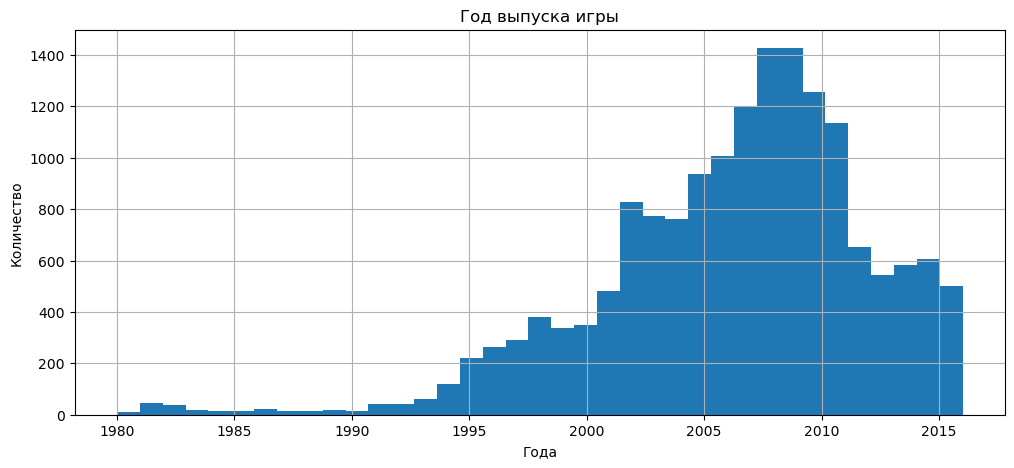

In [16]:
data.hist('year_of_release', bins=37, figsize=(12,5))
plt.title('Год выпуска игры')
plt.xlabel('Года')
plt.ylabel('Количество');
data['year_of_release'].value_counts()

Проводя анализ данных по столбцу "Год выпуска" можно сказать что пик популярности компьютерных игр прходится на 2006-2011 год. В те года выпускалось более 1000 игр в год. Начиная с 1990 года идет тренд на увеличение производства игр. Но с 2012 года выпуск компьютерных игр резко сократился, это могло быть связано с предстоящим выход Windows 10. Он сдерживает покупки новых ноутбуков и соостветенно выпуск новых компьютерных игр.
Для дальнешейго анализа инфрмацию об играх выпущенных до 1993 года можно удалить, т.к. во первых из количество крайне мало, а во-вторых игры выпущенные в те года врядли можно сранивать в современными и делать прогноз на будущее на основании устаревших игр.

In [17]:
data = data[data.year_of_release>=1993] #удаляем игры выпущенные ранее 1993 года
data['year_of_release'].count() #проверяем общее количетсво строк, чтобы не удалилить слишком много данных

16138

### Анализ платформ

Найдем список платформ на которых было сделано больше всего продаж:

In [18]:
import seaborn as sns

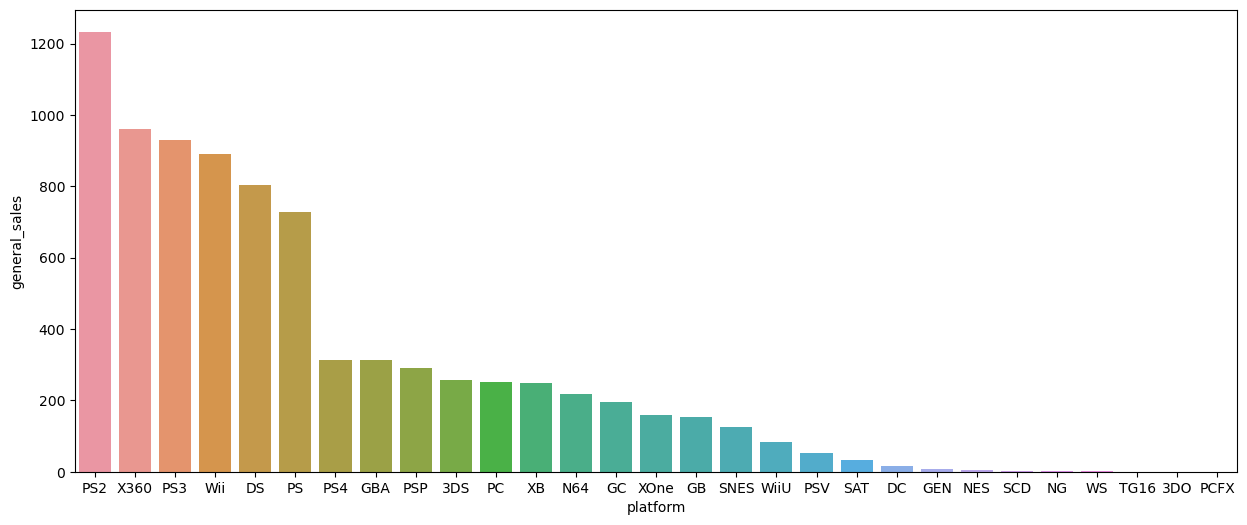

In [19]:
platform_sales = data.pivot_table(index='platform',values='general_sales',aggfunc=sum)\
    .sort_values('general_sales',ascending=False)\
    .reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='platform', y='general_sales', data=platform_sales)
plt.show()

Из полученных данных можно выделить ТОП-6 платформ, на которых было сделано больше всего продаж. На остальных платформах продают меньше чем в два раза.

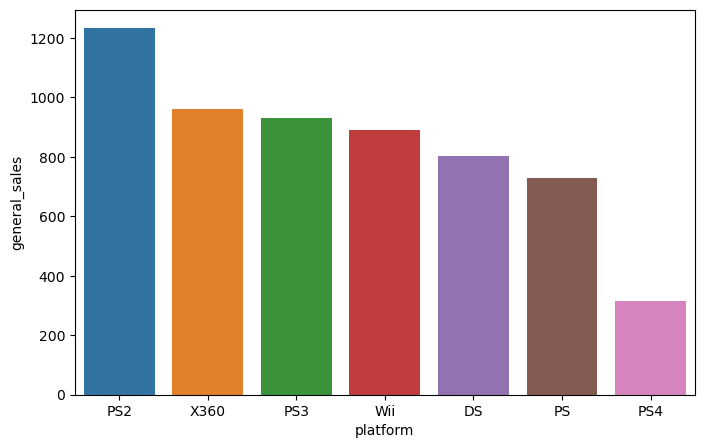

In [20]:
top_6_platform = platform_sales.query('general_sales>=314.14')\
#выделяем том-6 платформ с наибольшим кол. продаж
top_6_platform

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='platform', y='general_sales', data=top_6_platform)
plt.show()

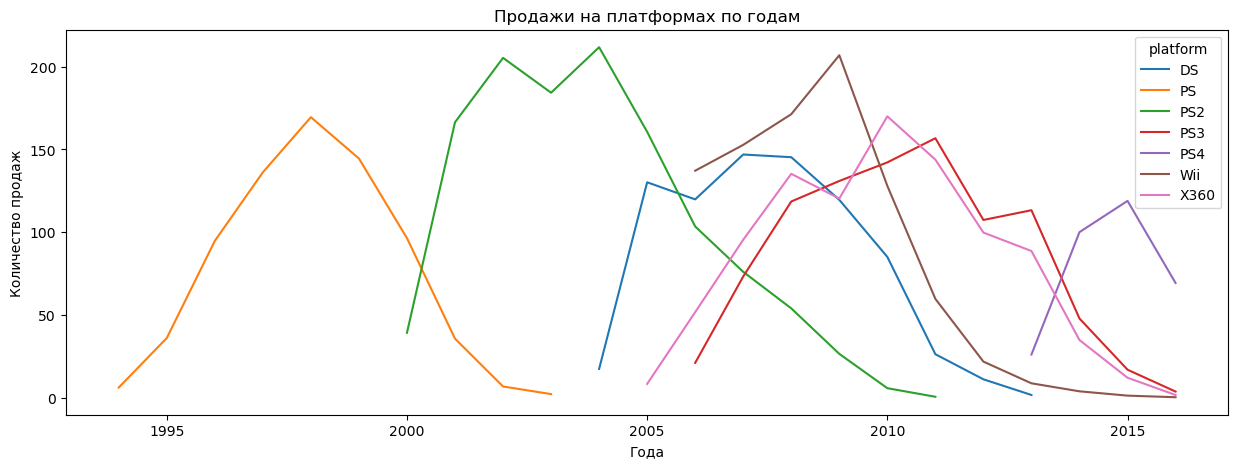

In [21]:
top = top_6_platform['platform'] #из получившегося датафрейма, выделяем спискок с названиеми платформ

platform_sales_of_year = data.query('platform in @top')\
    .pivot_table(index ='year_of_release', columns = 'platform', values='general_sales', aggfunc=sum)\
    .plot(kind='line', figsize=(15,5))
plt.title('Продажи на платформах по годам')
plt.xlabel('Года')
plt.ylabel('Количество продаж');
#строим общую гистограмму по срезу платформ по годам

Из получившегося графика можно сделать вывод, что в основном платформы существуют от 5 до 10 лет. Сначала они набирают обороты в течении пары лет, достигают своего пика продаж и далее продажи снижаются, что скорее всего обусловлено выходном более новых и современных платформ. В следствии этого продажи игр на более ранее виды платформ снижаются.

### Выбор данных за актуальный период

Исходя из полученных ранее данных, что платформы существует в основном около 5 лет, рост происходит в течении первых 2-3 лет, а далее теряют свою актуальность, для дальнейшего построения прогноза на 2017 года будем использовать данные за последние 3 года, т.е. с 2014 года.

In [22]:
new_data = data[data['year_of_release']>=2014] #делаем выборку актуальных данных
new_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NoRating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NoRating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NoRating,7.98


### Лидирующие платформы по продажам

Используя данные о продажах игр с 2014 года по 2016 год, найдем плафтформы которые продавали больше всего игр:

,platform,general_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


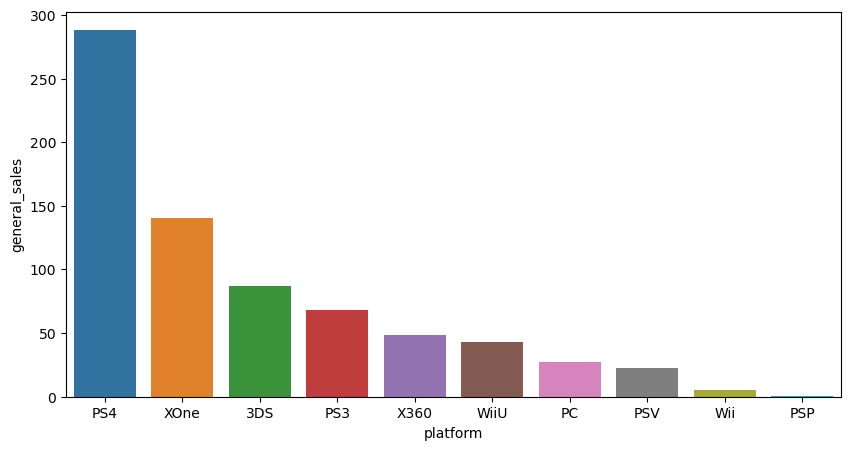

In [23]:
platform_after_2014 = new_data.pivot_table(index ='platform',values='general_sales', aggfunc=sum)\
    .sort_values(by='general_sales',ascending=False)\
    .reset_index() #сводная таблица по платформам и общим продажам
display(platform_after_2014)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='platform', y='general_sales', data=platform_after_2014)
plt.show()

Среди всех платформ можно выделить ТОП-5 с наибольшии продажами:
* PS4
* XOne
* 3DS
* 3DS
* X360	

Выделим эти платформы и посмотрим как изменялось колличество продаж:

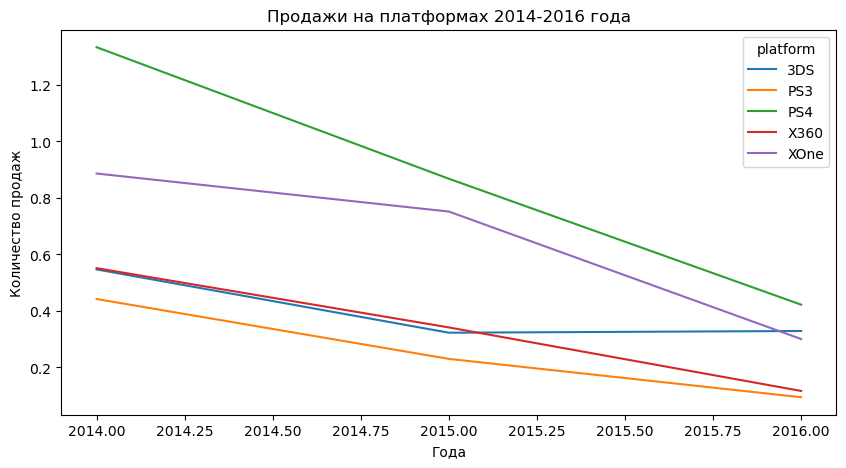

In [24]:
top_5_platform = platform_after_2014.query('general_sales>=45')#срез данных по платформам

top_after_2014 = top_5_platform['platform'] #Cписок топ5

platform_sales = new_data.query('platform in @top_after_2014')\
    .pivot_table(index ='year_of_release',columns = 'platform', values='general_sales')\
    .plot(kind='line', figsize=(10,5))
plt.title('Продажи на платформах 2014-2016 года')
plt.xlabel('Года')
plt.ylabel('Количество продаж');

# график продаж по топовым платформам

Исходя из того что платформы сущетсвуют около 5 лет можно сказать что у X360, PS3, 3DS уже был пик продаж в 2013 году, к 2016 году колличество продаж гораздо ниже и скорее всего в 2017 году игры для данных платформ продаваться уже не будут, ввиду выхода новых платформ.
Для **PS4 и XOne** продажи наоборот только начались в 2013 и с учетом того что данные за 2016 год еще не полные, можно предположить что в 2017 году основые продажи будут именно у этих платформ и они буду потенциально прибыльные. Стоит сделать упор на продажи игр именно для этих платформ.

###  «Ящик с усами» по глобальным продажам игр в разбивке по платформам

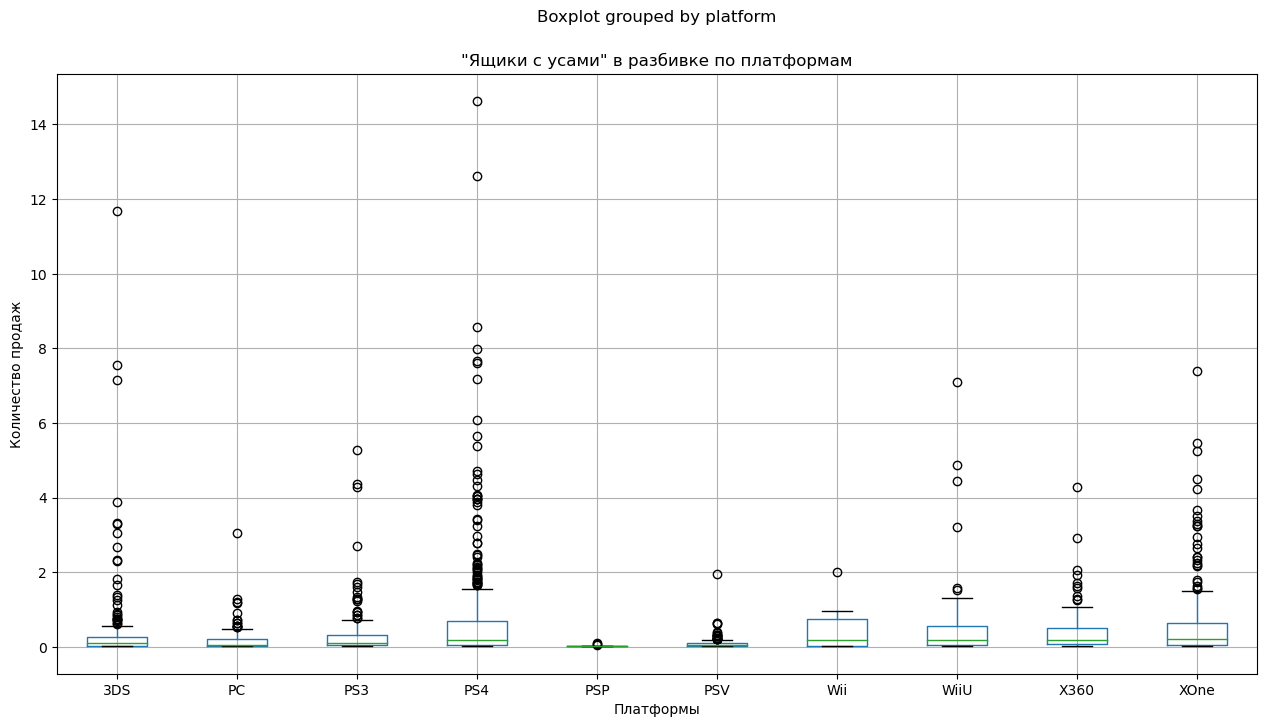

In [25]:
new_data.boxplot(column='general_sales',by='platform',figsize=(15,8))
plt.show
plt.title('"Ящики с усами" в разбивке по платформам')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж');

(0.0, 0.4)

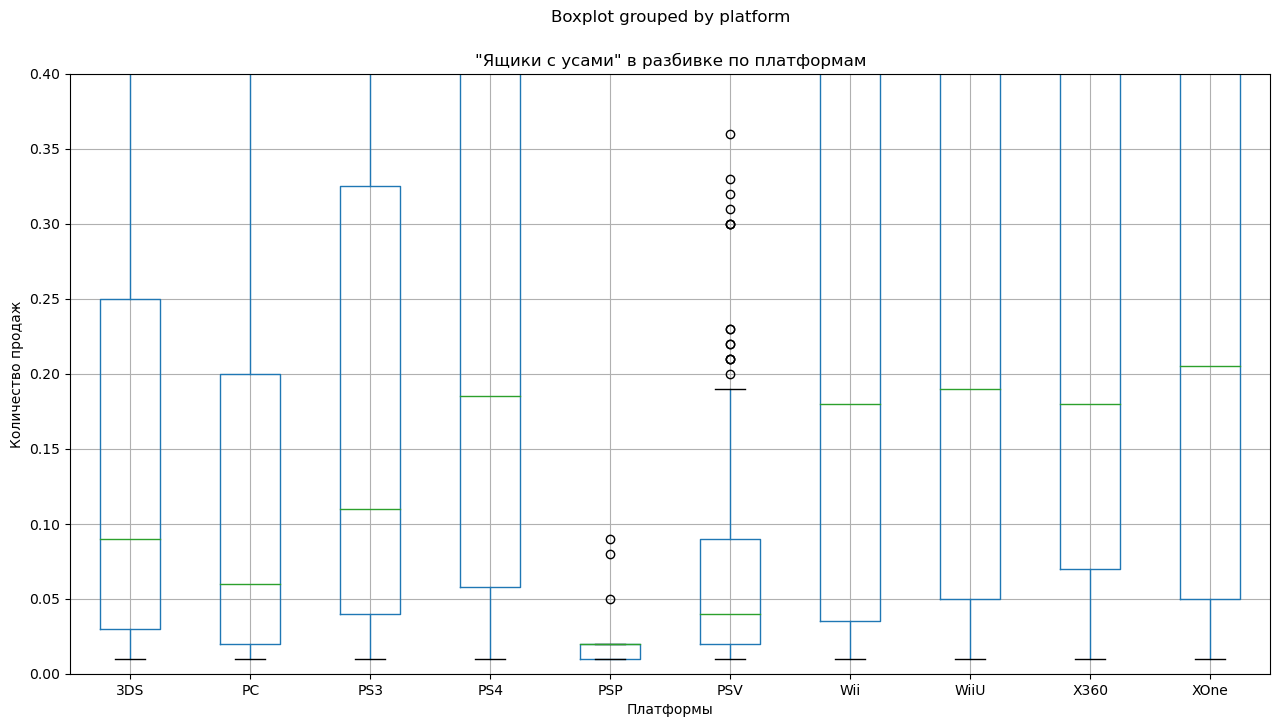

In [26]:
new_data.boxplot(column='general_sales',by='platform',figsize=(15,8))
plt.show
plt.title('"Ящики с усами" в разбивке по платформам')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж');
plt.ylim(0,0.4)#увеличила график по оси y для просмотра медианы

После построения данных графиков можно сказать, что у каждой плафтормы есть свои игры-лидеры по количеству продаж. На графиках они видны как выбросы. Если рассматривать медианные значения по платформам, то в лидерах находятся всё те же платформы PS4, XOne и ее предшественник X360, а также Wii и WiiU

### Влияние отзывов критиков и пользователей на продажи

Для влияния оценки пользователей и критиков на продажи игр, построим диаграммы рассеяния и расчитаем коэффициент корреляции по самой популярной платформе PS4:

Коэффициент корреляции оценки критиков и продаж: 0.328105086966363
Коэффициент корреляции оценки пользователей и продаж: -0.013070305002484585


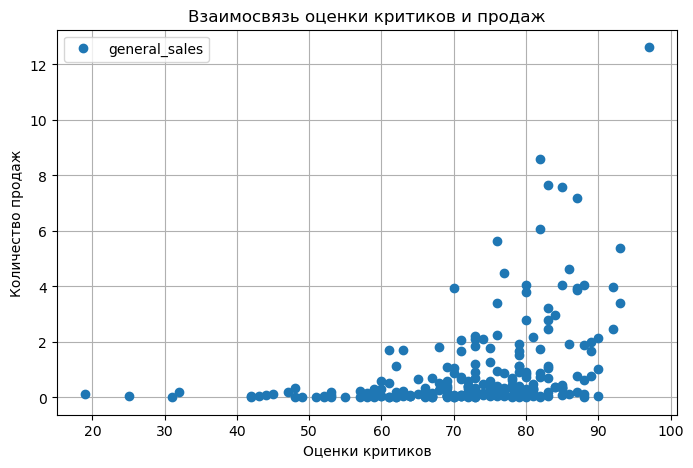

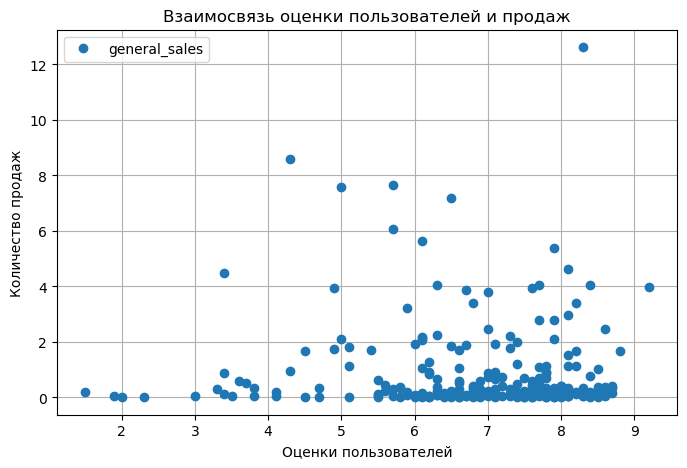

In [27]:
new_data.query("platform =='PS4'").plot(x='critic_score', y='general_sales',style='o', grid=True, figsize=(8,5),
                                       title='Взаимосвязь оценки критиков и продаж',xlabel='Оценки критиков',
                                       ylabel='Количество продаж')
#построение диаграмы рассеяния с оценкой критиков и продажами

new_data.query("platform =='PS4'").plot(x='user_score', y='general_sales', style='o', grid=True, figsize=(8,5),
                                       title='Взаимосвязь оценки пользователей и продаж',xlabel='Оценки пользователей',
                                       ylabel='Количество продаж'); 
#построение диаграмы рассеяния с оценкой пользоватаелей и продажами

print('Коэффициент корреляции оценки критиков и продаж:', new_data['critic_score'].corr(new_data['general_sales']))
print('Коэффициент корреляции оценки пользователей и продаж:', new_data['general_sales'].corr(new_data['user_score']))

На основании полученных данных можно сделать следующие выводы:
* Оценки критиков влияют на продажи игр: чем выше оценка критиков тем больше продаж конкретной игры. Это видно на диаграмме рассеяния, у игр с оценками более 60 объем продаж увеличивается.У игры с оценкой около 100 самые выоские продажи. Также взаимосвязь подтверждается коэффициентом корреляции-он положительный, но связь слабая. т.к значение стремится к 0 
* Оценки пользователей не влияют на продажи игр. В данном случае, можно предположить что пользователи редко ставят свои оценки и это не сильно влияет на уровень продаж. Коэффициент корреляции отрицательный, это означает что линейная зависимость между этими показателями отсутствует.

Соотнесем выводы с продажами игр на других платформах:

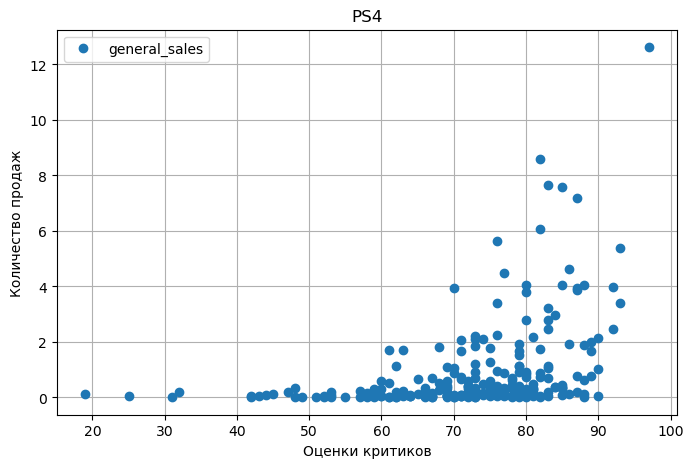

Коэффициент корреляции оценки критиков и продаж: 0.40266141068104083


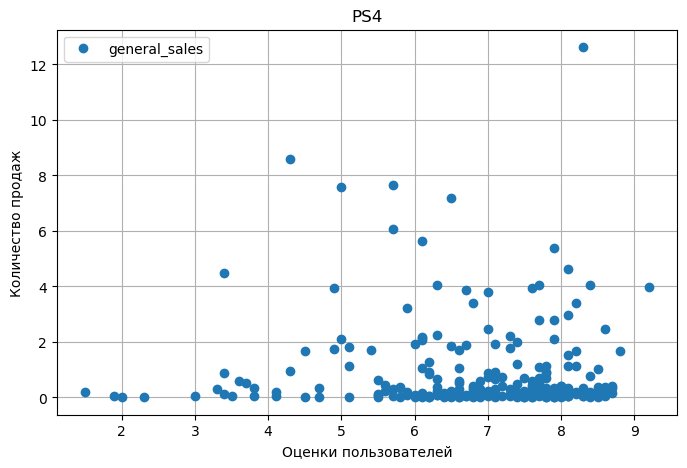

Коэффициент корреляции оценки пользователей и продаж: -0.040131589472697356


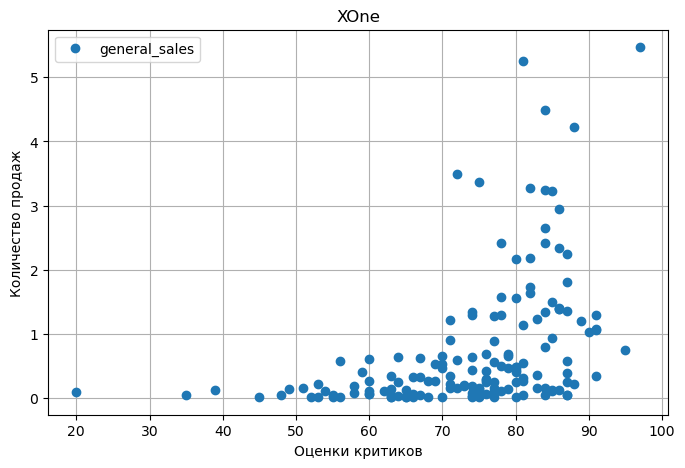

Коэффициент корреляции оценки критиков и продаж: 0.42867694370333226


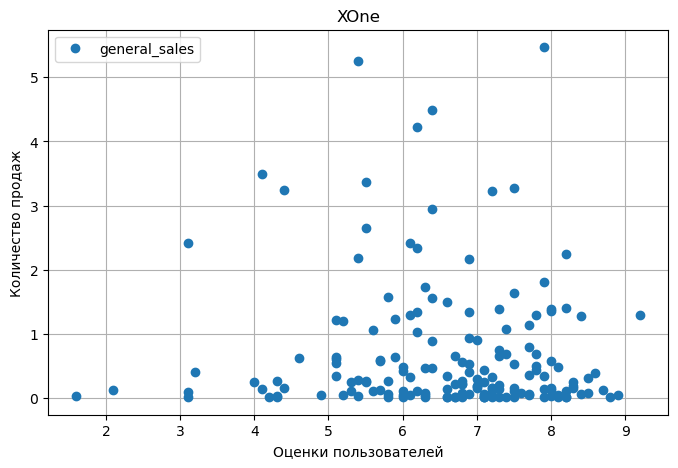

Коэффициент корреляции оценки пользователей и продаж: -0.0703839280647581


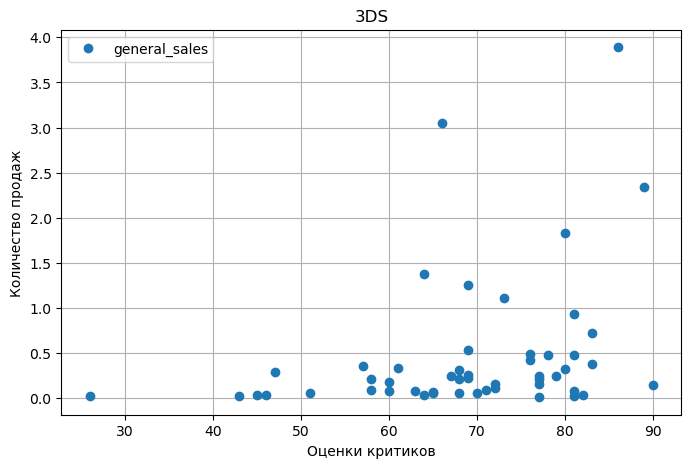

Коэффициент корреляции оценки критиков и продаж: 0.314117492869051


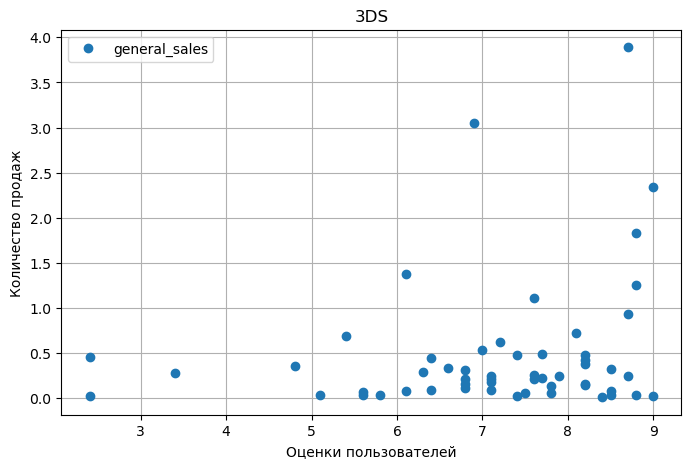

Коэффициент корреляции оценки пользователей и продаж: 0.2151932718527028


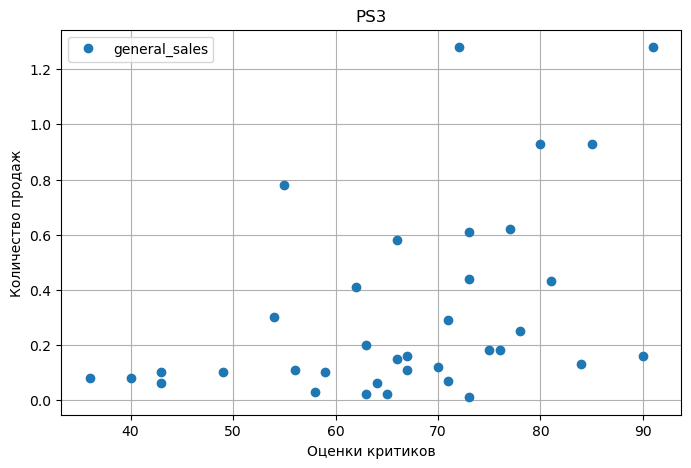

Коэффициент корреляции оценки критиков и продаж: 0.44657460493190704


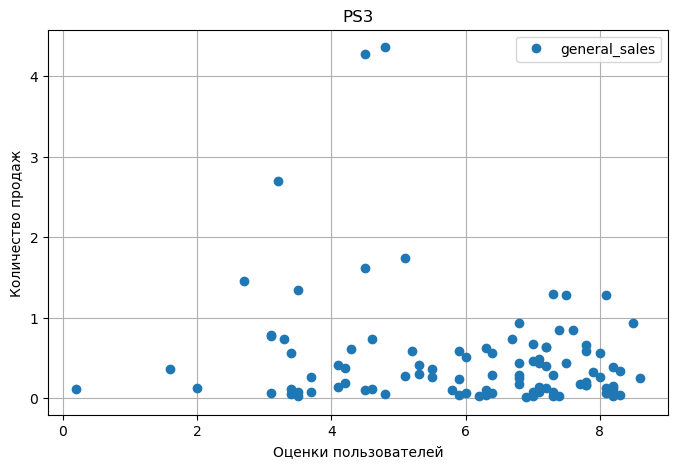

Коэффициент корреляции оценки пользователей и продаж: -0.16676141347662116


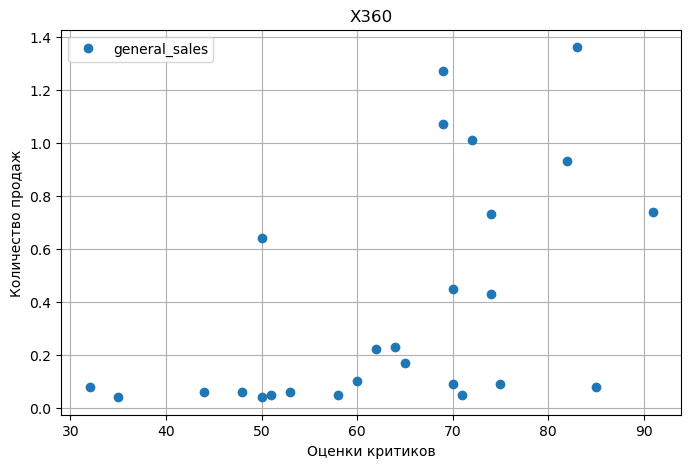

Коэффициент корреляции оценки критиков и продаж: 0.5257228356581523


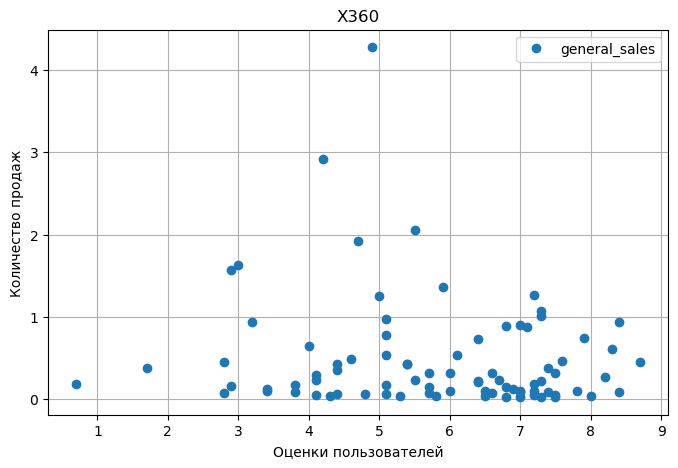

Коэффициент корреляции оценки пользователей и продаж: -0.138444570945665


In [28]:
for p in  top_after_2014:
    platform = new_data[new_data['platform']==p]
    new_data.query('platform==@p').plot(x='critic_score', y='general_sales',style='o', grid=True, figsize=(8,5),
                                       title=p,xlabel='Оценки критиков',
                                       ylabel='Количество продаж')
    plt.show()
    print('Коэффициент корреляции оценки критиков и продаж:', platform['critic_score'].corr(platform['general_sales']))
    new_data.query('platform==@p').plot(x='user_score', y='general_sales', style='o', grid=True, figsize=(8,5),
                                       title=p,xlabel='Оценки пользователей',
                                       ylabel='Количество продаж')
     #построение диаграмм рассеяния по каждой из платформ водящих в том после 2011 года
    plt.show()
    print('Коэффициент корреляции оценки пользователей и продаж:', platform['general_sales'].corr(platform['user_score']))


Смотря на диаграммы других платформ, можно сказать что предыдущие выводы подтверждаются: Оценки критиков больше влияют на продажи, чем оценки пользователей.

### Распределение игр по жанрам

Посмотрим какие жанры игр представлены в данных и какие медианные объемы продаж по каждому из них. Медианы расчитываем по причине того, что могут быть отдельные игры на отдельных платформах которые могут "выстрелить" и сильно изменить статистику по жанрам:

In [29]:
new_data.groupby('genre').agg({'general_sales':'median'}) \
    .sort_values('general_sales', ascending=False).reset_index() \
    .rename(columns={'genre':'Жанр игры',
                     'general_sales':'Cреднее кол-во продаж, млн.шт'})
#группируем данные по жанрам и количеству продаж

,Жанр игры,"Cреднее кол-во продаж, млн.шт"
0,Shooter,0.515
1,Sports,0.180
2,Platform,0.140
3,Fighting,0.125
4,Role-Playing,0.110
5,Simulation,0.100
6,Action,0.090
7,Misc,0.090
8,Racing,0.090
9,Strategy,0.060


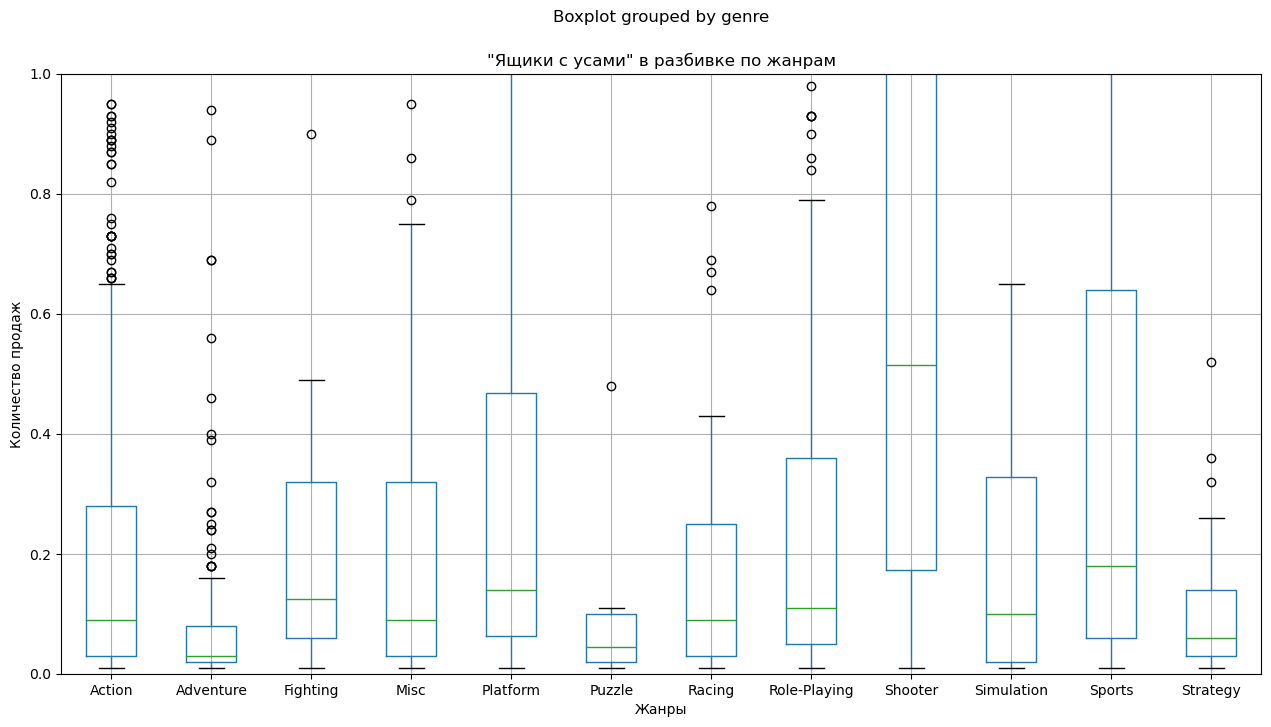

In [30]:
new_data.boxplot(column='general_sales',by='genre',figsize=(15,8))
plt.show
plt.title('"Ящики с усами" в разбивке по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Количество продаж');
plt.ylim(0,1);#увеличила график по оси y для просмотра медианы


На освновании полученых данных, а именно медианных значений продаж игр в разрезе по платформам, можно сделать вывод что самыми популярными жанром являются  Shotter ("Стрелялки"). Эти жанры отличаются зрелищностью и быстротой происходящего в игре, поэтому и более интересны пользоватаелям.Среднее количество продаж игр с данным жанром превышает почти в 3 раза. Cледующими по популярности являются Sports("Спорт") и Platform ("Платформер"). Самые минимальные продажи по играм с жанрами Puzzle("Пазл") и  Adventure	("Квест").Эти жанры более спокойные и игры более долгие по времени. В такие игры скорее всего играют больше дети и подростки.

## Портрет пользователя каждого региона

В наших данных представлены продажи компьютерных игр в такие регионах как Северная Америка, Европа, Япония и другие страны.
Посмотрим как продавались компьютерные игры в каждом из них:

### Северная Америка

,Платформа,Кол-во продаж
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


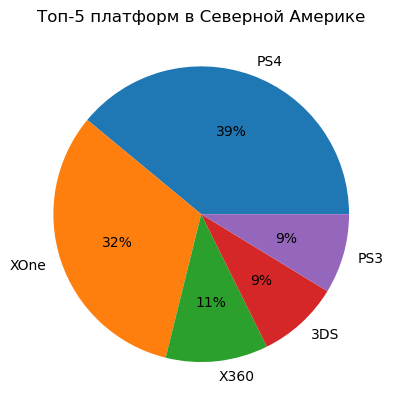

In [31]:
s_a= new_data.pivot_table(index='platform', values='na_sales', aggfunc=sum)\
    .sort_values('na_sales', ascending=False).head(5).reset_index()\
    .rename(columns={'platform':'Платформа',
                     'na_sales':'Кол-во продаж'})
display(s_a)
plt.pie(s_a['Кол-во продаж'], labels = s_a['Платформа'], autopct='%.0f%%')
plt.title('Топ-5 платформ в Северной Америке')
plt.show()
#группируем данные по платформам и колличетсву продаж в Северной Америке

,Жанр,Кол-во продаж
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


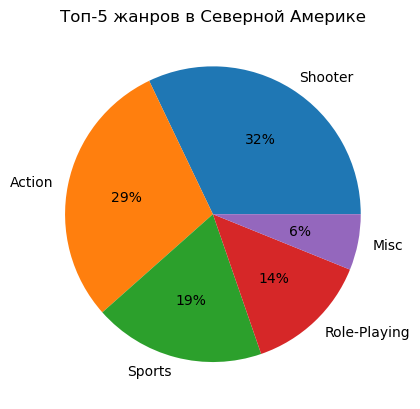

In [32]:
s_a_2=new_data.pivot_table(index='genre', values='na_sales', aggfunc=sum)\
    .sort_values('na_sales', ascending=False).head(5).reset_index()\
    .rename(columns={'genre':'Жанр',
                     'na_sales':'Кол-во продаж'})
display(s_a_2)
plt.pie(s_a_2['Кол-во продаж'], labels = s_a_2['Жанр'], autopct='%.0f%%')
plt.title('Топ-5 жанров в Северной Америке')
plt.show()
#группируем данные по жанрам и количеству продаж в Северной Америке

,Рейтинг,Кол-во продаж
0,M,96.42
1,NoRating,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


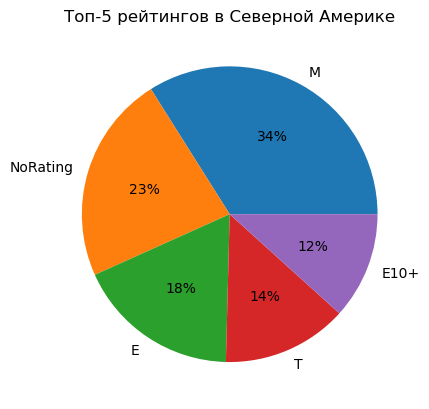

In [33]:
s_a_3=new_data.pivot_table(index='rating', values='na_sales', aggfunc=sum)\
    .sort_values('na_sales', ascending=False).head(5).reset_index()\
    .rename(columns={'rating':'Рейтинг',
                     'na_sales':'Кол-во продаж'})
display(s_a_3)
plt.pie(s_a_3['Кол-во продаж'], labels = s_a_3['Рейтинг'], autopct='%.0f%%')
plt.title('Топ-5 рейтингов в Северной Америке')
plt.show()
#группируем данные по рейтингу и количеству продаж в Северной Америке

На основании полученных данных можно сказать следующее:
* Самые популярные плафтормы в С.Америке это PS4,X360 и XOne.
* Самые популярные жанры в С.Америке "Экшн","Стрелялки" и "Спорт"
* Топ рейтингов игр : "От 17 и выше" и "для всех" или игры без рейтинга

### Европа

,Платформа,Кол-во продаж
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


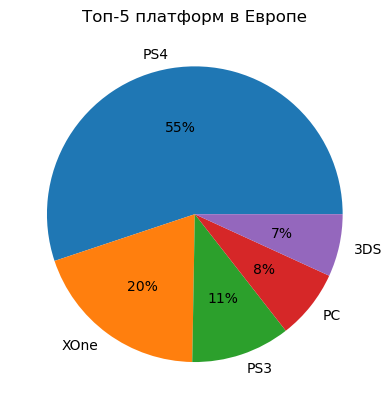

In [34]:
e = new_data.pivot_table(index='platform', values='eu_sales', aggfunc=sum)\
    .sort_values('eu_sales', ascending=False).head(5).reset_index()\
    .rename(columns={'platform':'Платформа',
                     'eu_sales':'Кол-во продаж'})
display(e)
plt.pie(e['Кол-во продаж'], labels = e['Платформа'], autopct='%.0f%%')
plt.title('Топ-5 платформ в Европе')
plt.show()
#группируем данные по платформам и количеству продаж в Европе

,Жанр,Кол-во продаж
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


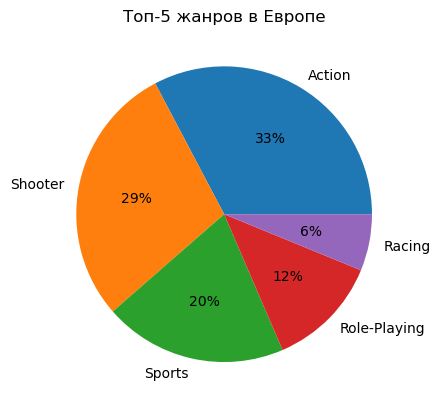

In [35]:
e_2=new_data.pivot_table(index='genre', values='eu_sales', aggfunc=sum)\
    .sort_values('eu_sales', ascending=False).head(5).reset_index()\
    .rename(columns={'genre':'Жанр',
                     'eu_sales':'Кол-во продаж'})
display(e_2)
plt.pie(e_2['Кол-во продаж'], labels = e_2['Жанр'], autopct='%.0f%%')
plt.title('Топ-5 жанров в Европе')
plt.show()
#группируем данные по жанрам и количеству продаж в Европе

,Рейтинг,Кол-во продаж
0,M,93.44
1,NoRating,58.95
2,E,58.06
3,T,34.07
4,E10+,26.16


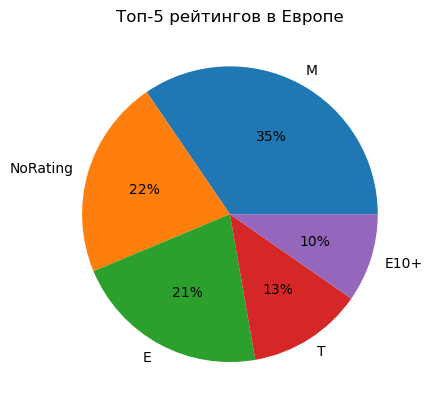

In [36]:
e_3=new_data.pivot_table(index='rating', values='eu_sales', aggfunc=sum)\
    .sort_values('eu_sales', ascending=False).head(5).reset_index()\
    .rename(columns={'rating':'Рейтинг',
                     'eu_sales':'Кол-во продаж'})
display(e_3)
plt.pie(e_3['Кол-во продаж'], labels = e_3['Рейтинг'], autopct='%.0f%%')
plt.title('Топ-5 рейтингов в Европе')
plt.show()
#группируем данные по рейтингу и количеству продаж в Европе

На основании полученных данных можно сказать следующее:
* Самые популярные плафтормы в Европе PS4, XOne,PS3;
* Самые популярные жанры в Европе такие же как и в С.Америке: "Экшн","Стрелялки" и "Спорт"
* Топ рейтингов игр : "От 17 и выше" и "для всех"

### Япония

,Платформа,Кол-во продаж
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


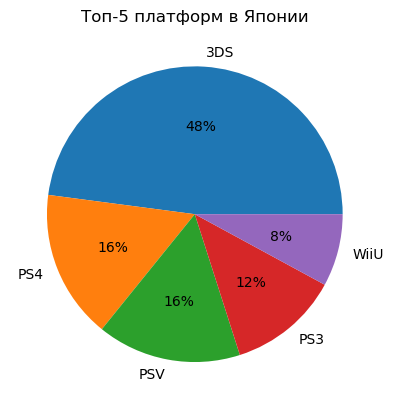

In [37]:
j = new_data.pivot_table(index='platform', values='jp_sales', aggfunc=sum)\
    .sort_values('jp_sales', ascending=False).head(5).reset_index()\
    .rename(columns={'platform':'Платформа',
                     'jp_sales':'Кол-во продаж'})
display(j)
plt.pie(j['Кол-во продаж'], labels = j['Платформа'], autopct='%.0f%%')
plt.title('Топ-5 платформ в Японии')
plt.show()
#группируем данные по платформам и количеству продаж в Японии

,Жанр,Кол-во продаж
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


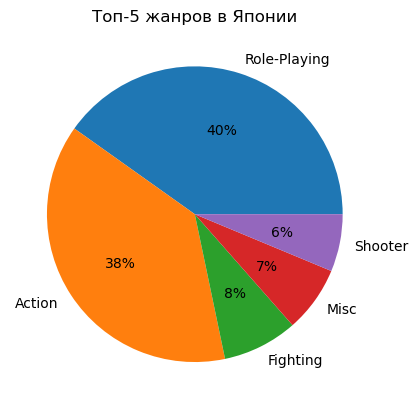

In [38]:
j_2=new_data.pivot_table(index='genre', values='jp_sales', aggfunc=sum)\
    .sort_values('jp_sales', ascending=False).head(5).reset_index()\
    .rename(columns={'genre':'Жанр',
                     'jp_sales':'Кол-во продаж'})
display(j_2)
plt.pie(j_2['Кол-во продаж'], labels = j_2['Жанр'], autopct='%.0f%%')
plt.title('Топ-5 жанров в Японии')
plt.show()
#группируем данные по жанрам и количеству продаж в Японии

,Рейтинг,Кол-во продаж
0,NoRating,56.90
1,T,14.78
2,E,8.94
3,M,8.01
4,E10+,4.46


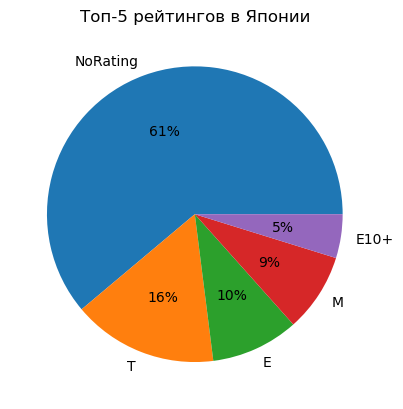

In [39]:
j_3=new_data.pivot_table(index='rating', values='jp_sales', aggfunc=sum)\
    .sort_values('jp_sales', ascending=False).head(5).reset_index()\
    .rename(columns={'rating':'Рейтинг',
                     'jp_sales':'Кол-во продаж'})
display(j_3)
plt.pie(j_3['Кол-во продаж'], labels = j_3['Рейтинг'], autopct='%.0f%%')
plt.title('Топ-5 рейтингов в Японии')
plt.show()
#группируем данные по рейтингу и количеству продаж в Японии

На основании полученных данных можно сказать следующее:
* Самые популярной платформоой в Японии является 3DS, это оъяснимо тем что она производится в Японии. Но также в топе PSV и PS4.
* Самые популярные жанры в Японии: "Ролевые игры","Экшн"
* У большинства игр продаваемых в Японии вообще нет рейтинга. А те игры у которых есть рейтинг он "для всех" или "подростками от 13 до 17 лет"


</font><font color='Blue'><b>Комментарий студента</b></font><br>
Добавила круговые диаграммы по каждому расчету и региону, но как их сделать в одну красивую линию как  у тебя так и не поняла...если покажешь буду рада научиться и использовать в будущем.

## Проверка гипотез

После проведения исследовательского анализа данных, проверим гипотезы:

**1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**

Сформулируем нулевую и альтернативную гипотезу:
* Нулевая гипотеза : Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Альтернативная гипотеза : Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [40]:
from scipy import stats as st
import numpy as np #импортируем библиотеки

score_xbox = new_data[new_data['platform']=='XOne']['user_score'].dropna() 
#срез данных по платформе XOne и рейтингу пользователей без пропусков
print('Средний рейтинг пользователей платформы XOne-',score_xbox.mean())

score_pc = new_data[new_data['platform']=='PC']['user_score'].dropna()
#срез данных по платформе PC и рейтингу пользователей без пропусков
print('Средний рейтинг пользователей платформы PC-',score_pc.mean())

alpha = 0.05

results = st.ttest_ind(score_xbox, score_pc,equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний рейтинг пользователей платформы XOne- 6.594545454545453
Средний рейтинг пользователей платформы PC- 6.298360655737703
p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Расчитав p-значение не получилось опровергнуть Нулевую гипотезу. То есть, с вероятностью в 6% можно получить разные средние рейтинги двух платформ

**2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

* Нулевая гипотеза : Средние пользовательские рейтинги жанров Action и Sports одинаковые
* Альтернативная гипотеза : Средние пользовательские рейтинги жанров Action и Sports различаются

In [41]:
score_action = new_data[new_data['genre']=='Action']['user_score'].dropna()
#срез данных по жанру Action и рейтингу пользователей без пропусков
print('Средний рейтинг пользователей жанра Action-',score_action.mean())

score_sports = new_data[new_data['genre']=='Sports']['user_score'].dropna()
#срез данных по жанру Sports и рейтингу пользователей без пропусков
print('Средний рейтинг пользователей жанра Sports-',score_sports.mean())

alpha = 0.05

results = st.ttest_ind(score_action, score_sports,equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний рейтинг пользователей жанра Action- 6.760606060606054
Средний рейтинг пользователей жанра Sports- 5.225196850393697
p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Расчитав p-значение, мы отвергли Нулевую гипотезу. Таким образом, мы не можем получить одинаковые средние рейтинги по двум жанрам.

**Вывод по проверке гипотез:**

1. Сформулировали нулевую гипотезу, о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.Т.к. эта гипотеза двухстороняя, то альтернативная гипотеза противоположна ей. Использвали 2 выборки котороые подходя для проверки гипотезы:оценки пользователей платформ Xbox One и PC. Для оценки использован метод ttest_ind() который рассчитывает вероятность совпадения средних значений p-value.
В ходе исследования не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Т.к. полученная вероятность совпадения значений больше критического уровня статистической значимости, который определен как обещепринятое пороговое значение 0.05

2. Проверили вторую гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Альетернативная гипотеза была сформулирована также противоположно нулевой. Для оценки использован метод ttest_ind() который рассчитывает вероятность совпадения средних значений p-value.
Не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные. Т.к. полученная вероятность совпадения значений меньше критического уровня статистической значимости, который определен как обещепринятое пороговое значение 0.05

## Общий вывод

Проведя анализ данных о продаже компьютерных игр можно сделать следующие выводы:
* В основном платформы существуют от 5 до 10 лет. Сначала они набирают обороты в течении пары лет, достигают своего пика продаж и далее продажи снижаются, что скорее всего обусловлено выходном более новых и современных платформ.
* Для получения потенциально прибыльных платформ необходимо анализировать период за последние 5 лет
* Потенциально прибыльные платформы для которых стоит рассматриваать продажи компютерных игр в 2017 году это PS4 и Xone
* Для выбора потенциально прибыльной игры стоит учитывать рейтинг критиков, он влияет на колличество продаж, но не сильно.
* Стоить обратить внимание на такие жанры игр как Sports ("Спорт") и Shotter ("Стрелялки"), по ним продаж будет значительно больше.

Если рассматривать продажи для конкретных регионов, то стоит обратить внимание на следющие факторы:
* В Северной Америке популярны такие платформы как PS4,X360 и XOne. Среди жанров лидируют "Экшн","Стрелялки" и "Спорт", а по рейтингу можно ориентировать на "От 17 и выше" и "для всех"
* В Европе предпочитают такие платформы как PS4, XOne,PS3. Среди жанров также лидируют "Экшн","Стрелялки" и "Спорт", а по рейтингу можно ориентировать на "От 17 и выше" и "для всех"
* В Японии более популярны портативные консоли 3DS,PSP и PSV, либо обычные PS3 и PS4. Популярные жанры:"Ролевые игры","Экшн". На рейтинг в Японии сильно не ориентируются

Рекомендации, на что потратить рекламный бюджет:
* Потенциально прибыльные платформы для которых стоит рассматриваать продажи компютерных игр в 2017 году это PS4 и Xone
* обратить внимание на такие жанры игр как Sports ("Спорт") и Shotter ("Стрелялки")
* На отзывы покупателей не стоит обращать внимание, а вот на отзывы критиков можно.
* При планировании рекламы в С.Америке стоит ориентироваться на рейтинг ESRB, в Европе и Японии не обращать на них сильное внимание.